<a href="https://www.kaggle.com/code/niramay/nb-svm-dt-ada-rf-ann-clfs?scriptVersionId=111485380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/-coffeemakerclassification/coffee_maker.csv


In [2]:
all_data = pd.read_csv('/kaggle/input/-coffeemakerclassification/coffee_maker.csv')
all_data.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


In [3]:
# creating a label column based on the product ratings. 
# Negative sentiment is the outcome of interest. 
# Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment

all_data['label'] = all_data.apply(lambda row: row.rating>3.0,axis=1)
all_data['label'] = all_data['label'].astype(int)
all_data.head()

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...,0


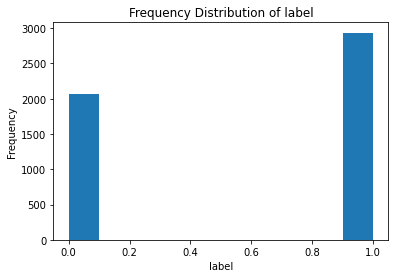

In [4]:
# Assessing label class distribution

plt.hist(all_data['label'])
plt.gca().set(title = 'Frequency Distribution of label',ylabel='Frequency',xlabel='label')
plt.show()

In [5]:
all_data['review'] = all_data['review'].astype(str).apply(lambda x:x.lower())
all_data.head()

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,update: bought this 10-21-18 and i finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,the big reason i ordered this was because i wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,i've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,i agonized over which coffee maker to purchase...,0


**Train/Test Split**

In [6]:
X = all_data['review']
y = all_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

**Logistic Regression Model**

In [7]:
lr= LogisticRegression()

pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('Logistic Regression',lr),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________Logistic Regression Model_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________Logistic Regression Model_________
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       622
           1       0.89      0.91      0.90       878

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500

ROC AUC:  0.9460105545342015
Precision/Recall AUC:  0.34227537332320923


**SVM**

In [8]:
model = svm.SVC(probability=True)

pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('SVM',model),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________SVM_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________SVM_________
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       622
           1       0.91      0.91      0.91       878

    accuracy                           0.90      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.90      0.90      0.90      1500

ROC AUC:  0.9498476514147177
Precision/Recall AUC:  0.35062827690050574


**Decision Tree Classifier**

In [9]:
dt = DecisionTreeClassifier(max_depth=5)

pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('Decision Tree Classifier',dt),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________Decision Tree Classifier_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________Decision Tree Classifier_________
              precision    recall  f1-score   support

           0       0.58      0.90      0.71       622
           1       0.89      0.54      0.67       878

    accuracy                           0.69      1500
   macro avg       0.74      0.72      0.69      1500
weighted avg       0.76      0.69      0.69      1500

ROC AUC:  0.793804796050656
Precision/Recall AUC:  0.26376713244710387


**Random Forest Classifier**

In [10]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10)


pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('Random Forest Classifier',rf),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________Random Forest Classifier_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________Random Forest Classifier_________
              precision    recall  f1-score   support

           0       0.86      0.31      0.46       622
           1       0.66      0.96      0.79       878

    accuracy                           0.69      1500
   macro avg       0.76      0.64      0.62      1500
weighted avg       0.74      0.69      0.65      1500

ROC AUC:  0.832539240747387
Precision/Recall AUC:  0.23913521644859098


**ANN**

In [11]:
mlp = MLPClassifier(alpha=1, max_iter=1000)


pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('ANN',mlp),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________ ANN _________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________ ANN _________
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       622
           1       0.91      0.90      0.91       878

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500

ROC AUC:  0.9475468581766512
Precision/Recall AUC:  0.35134768105828185


**Naive Bayes**

In [12]:
nb = MultinomialNB()
pipe = Pipeline([
            ('tfidf', TfidfVectorizer()), 
            ('Multinomial Naive Bayes',nb),
            ])

pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
pred_prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

print("_________Multinomial Naive Bayes_________")
print(classification_report(y_test, pred))
print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

_________Multinomial Naive Bayes_________
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       622
           1       0.82      0.96      0.89       878

    accuracy                           0.86      1500
   macro avg       0.88      0.83      0.84      1500
weighted avg       0.87      0.86      0.85      1500

ROC AUC:  0.942683422569564
Precision/Recall AUC:  0.31778971035967296


# Choice of Model 

Out of all the models, Logistic Regression model performs the best. The Precision, Recall, f1-score, accuracy, ROC AUC are all good. 
In case of Naive Bayes, the recall is low.
In case of ANN, the none of the metrics are low, but since Logistic Regression also gives similar scores, it is better to choose Logistic Regression model since it takes lesser time to train and is easier to interpret and implement. 
The precision and recall is very low in case of Random Forest Classifier so it is not a good choice. 
In case of Decision Tree Classifier, the ROC AUC, precision, recall are low and this model cannot be used. 

In [13]:
               ,
               

''